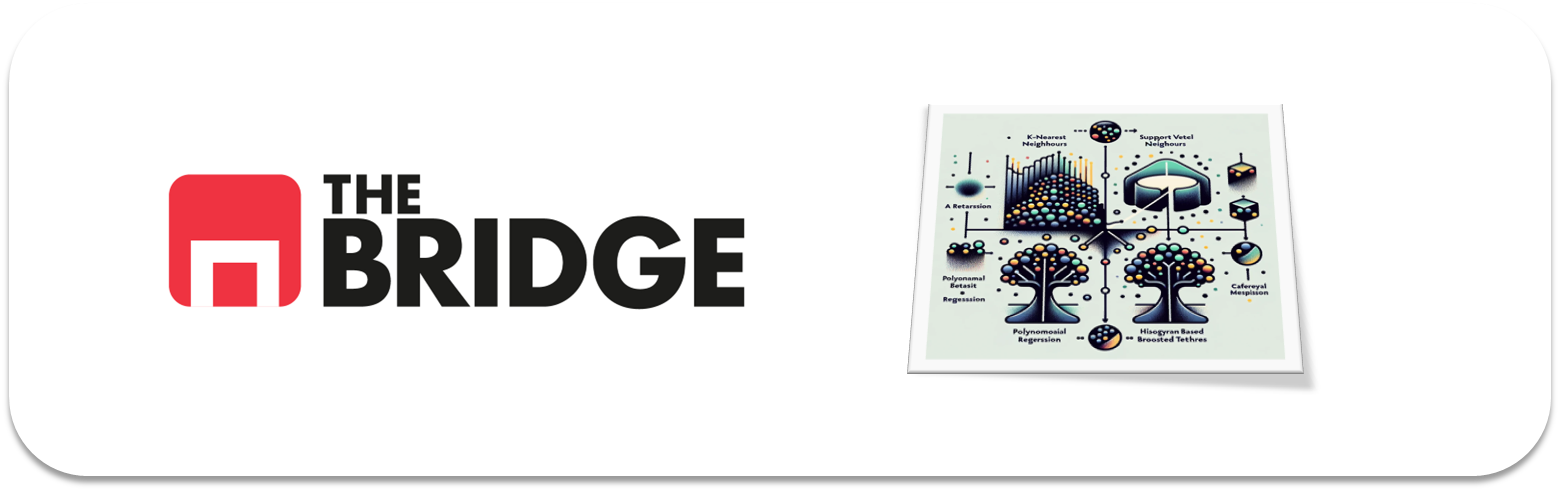

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import functions as fnc

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
import bootcampviztools as bt

### #1. El problema y los datos

In [3]:
df = pd.read_csv("./data/credit_npo.csv")
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [4]:
fnc.tipifica_variables(df)

,variable,tipo
0,SeriousDlqin2yrs,Binaria
1,RevolvingUtilizationOfUnsecuredLines,Numérica Continua
2,age,Numérica Discreta
3,NumberOfTime30-59DaysPastDueNotWorse,Numérica Discreta
4,DebtRatio,Numérica Continua
5,MonthlyIncome,Numérica Continua
6,NumberOfOpenCreditLinesAndLoans,Numérica Discreta
7,NumberOfTimes90DaysLate,Numérica Discreta
8,NumberRealEstateLoansOrLines,Numérica Discreta
9,NumberOfTime60-89DaysPastDueNotWorse,Categórica


1. SeriousDlqin2yrs: persona con 90 días de morosidad o más (posible target)
1. RevolvingUtilizationOfUnsecuredLines: saldo total de tarjetas de crédito y créditos personales entre la suma de los límites de crédito (%)
1. age: edad
1. NumberOfTime30-59DaysPastDueNotWorse: número de veces que ha estado debiendo entre 30-59 días
1. DebtRatio: pagos mensuales de deudas y otros gastos de manutención entre los ingresos brutos mensuales (%)
1. MonthlyIncome: ingresos mensuales
1. NumberOfOpenCreditLinesAndLoans: número de créditos abiertos
1. NumberOfTimes90DaysLate: número de veces que ha estado debiendo 90 días o más
1. NumberRealEstateLoansOrLines: número de hipotecas y créditos relacionados con real estate
1. NumberOfTime60-89DaysPastDueNotWorse: número de veces que ha estado debiendo entre 60-89 días
1. NumberOfDependents: número de personas dependientes del usuario

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

Es un problema de clasificación con la variable target SeriousDlqin2yrs.

### #1.3
Pinta la distribución de frecuencias del target y coméntala

<Axes: >

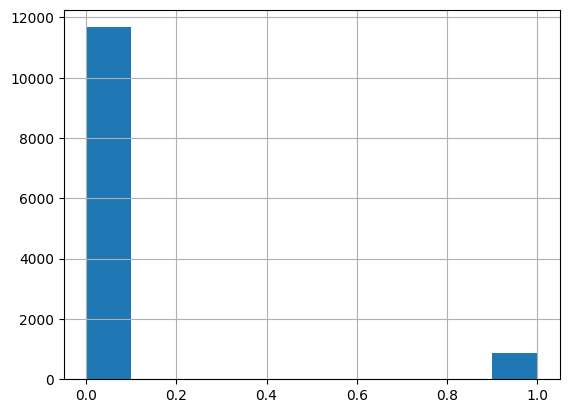

In [5]:
df["SeriousDlqin2yrs"].hist()

In [6]:
df["SeriousDlqin2yrs"].value_counts(normalize=True)

SeriousDlqin2yrs
0    0.931084
1    0.068916
Name: proportion, dtype: float64

Estamos ante un problema muy desbalanceado, 93-7.

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [8]:
df.isna().sum()

SeriousDlqin2yrs                          0
RevolvingUtilizationOfUnsecuredLines      0
age                                       0
NumberOfTime30-59DaysPastDueNotWorse      0
DebtRatio                                 0
MonthlyIncome                           721
NumberOfOpenCreditLinesAndLoans           0
NumberOfTimes90DaysLate                   0
NumberRealEstateLoansOrLines              0
NumberOfTime60-89DaysPastDueNotWorse      0
NumberOfDependents                      177
dtype: int64

Como tenemos un dataset con bastantes entradas, podemos vamos a eliminar las entradas que tengan nulos en algún campo:

In [9]:
df_back_up = df.copy()
df.dropna(inplace = True)

In [10]:
target = "SeriousDlqin2yrs"

In [11]:
train, test = train_test_split(df, test_size = 0.2, random_state= 42)

Solo tenemos una supuesta columna categórica: NumberOfTime60-89DaysPastDueNotWorse

In [12]:
train["NumberOfTime60-89DaysPastDueNotWorse"].value_counts()

NumberOfTime60-89DaysPastDueNotWorse
0     8953
1      383
2       76
3       14
4       13
98       8
5        4
11       1
Name: count, dtype: int64

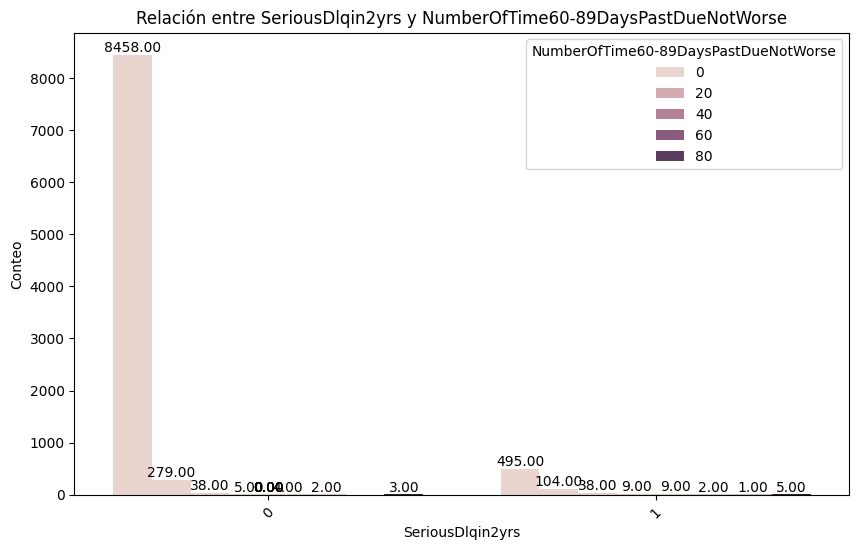

In [13]:
bt.plot_categorical_relationship_fin(train, target, "NumberOfTime60-89DaysPastDueNotWorse", show_values=True)

No vamos a quedarnos con esta variable, porque no parece que vaya a ser demasiado interesante. 

In [14]:
feat_num = train.columns.to_list()
feat_num.remove(target)
feat_num.remove("NumberOfTime60-89DaysPastDueNotWorse")

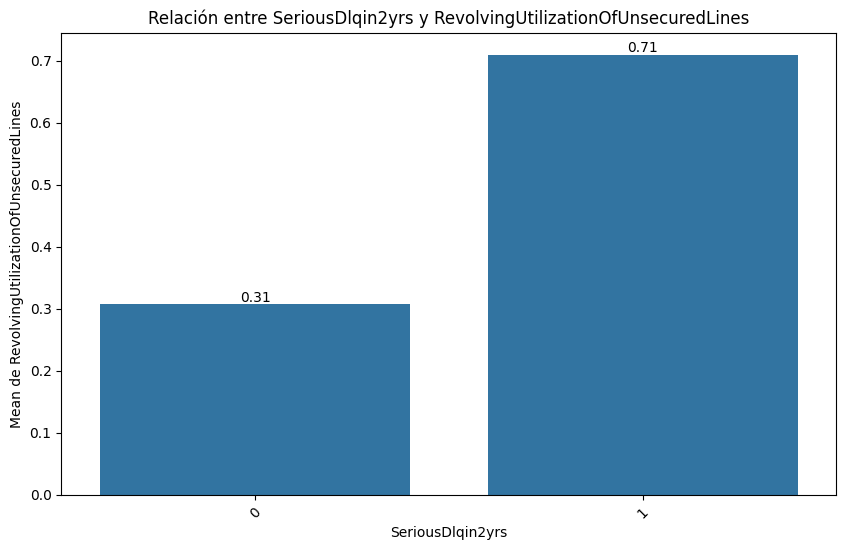

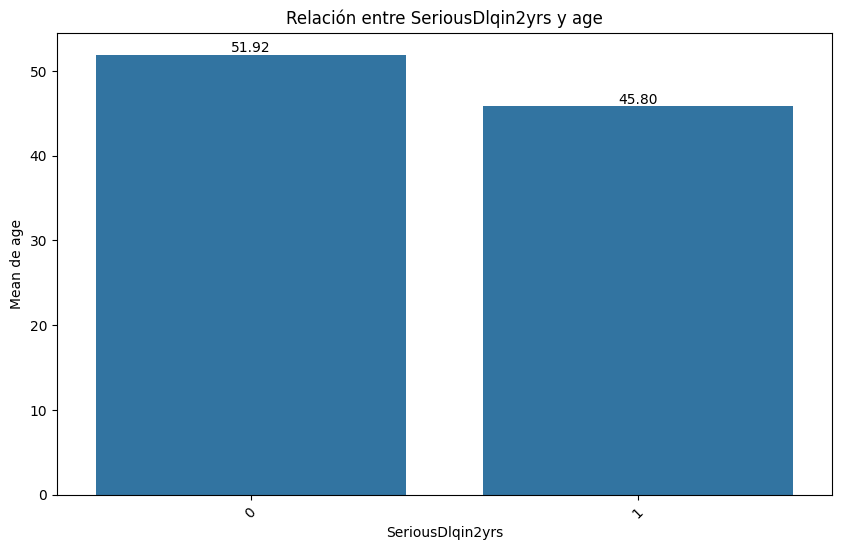

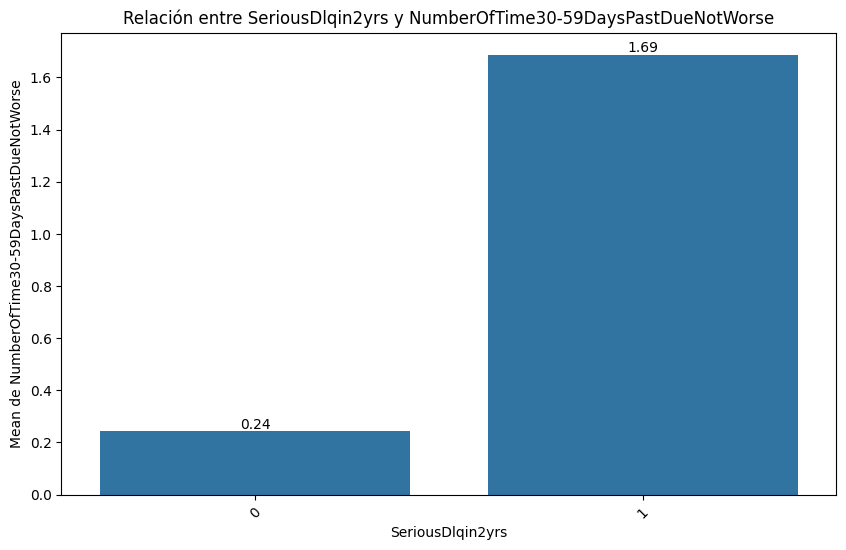

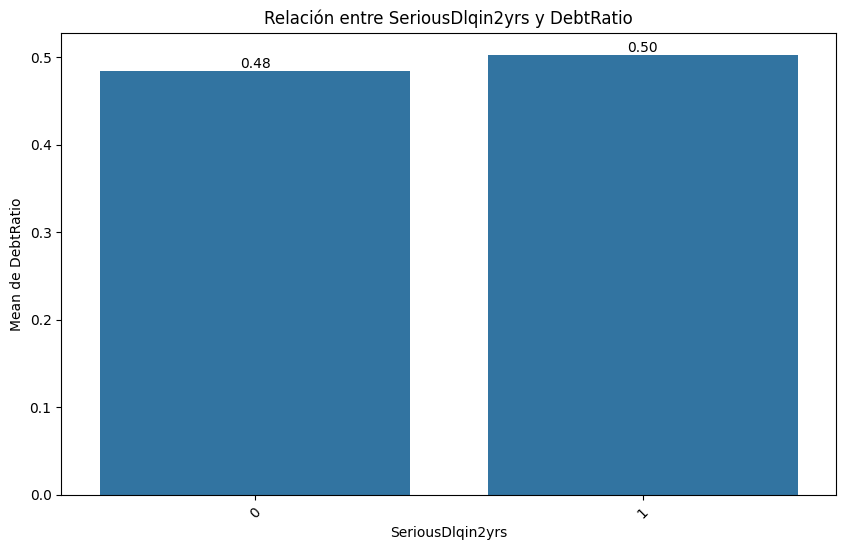

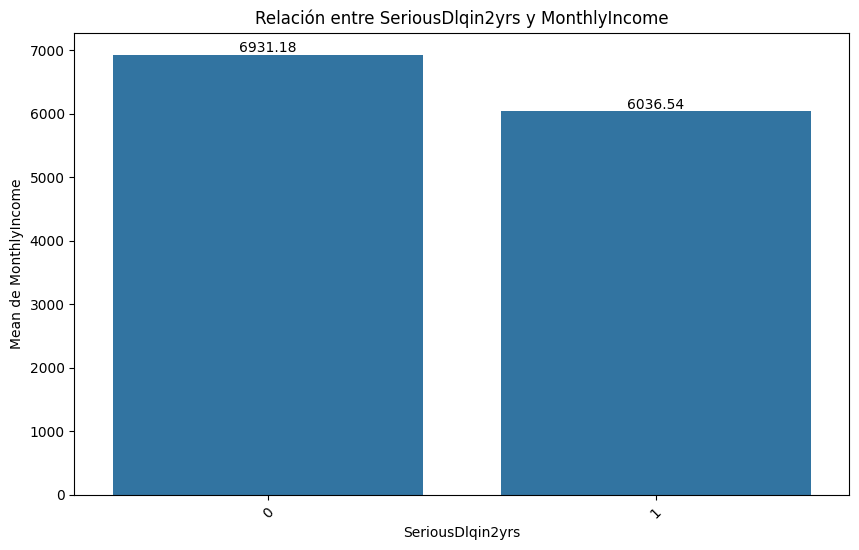

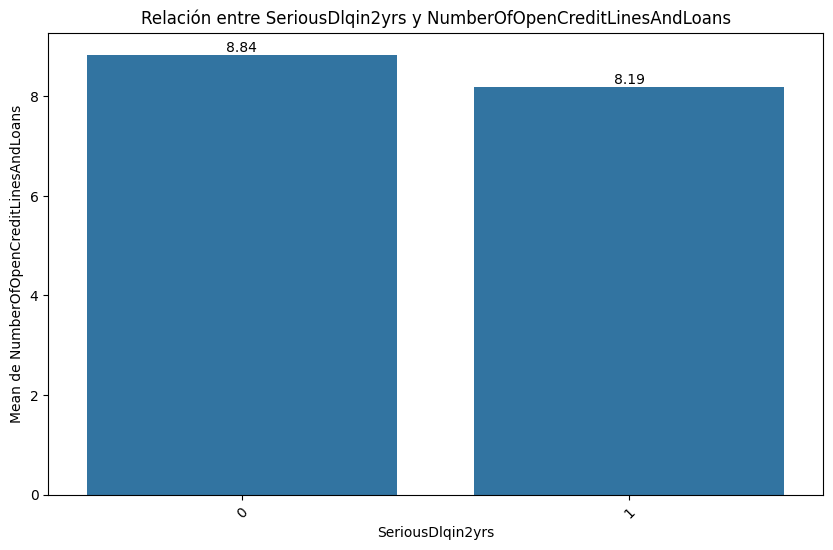

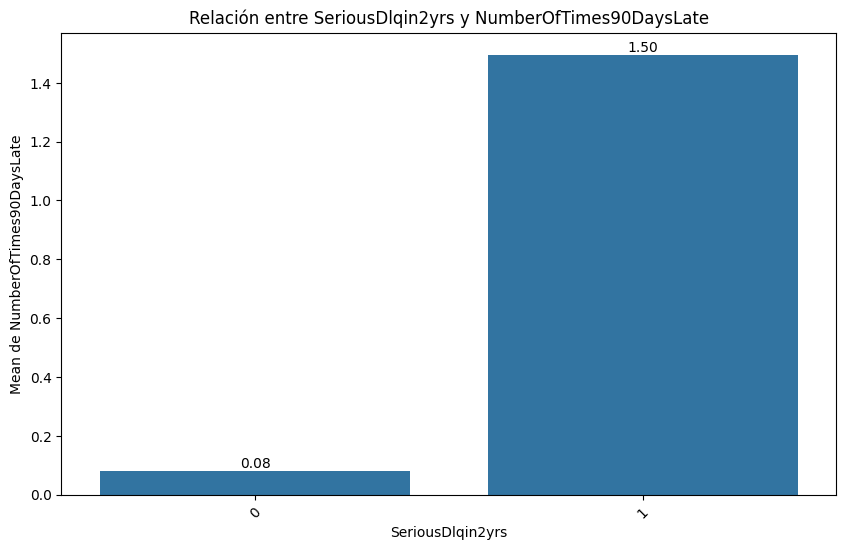

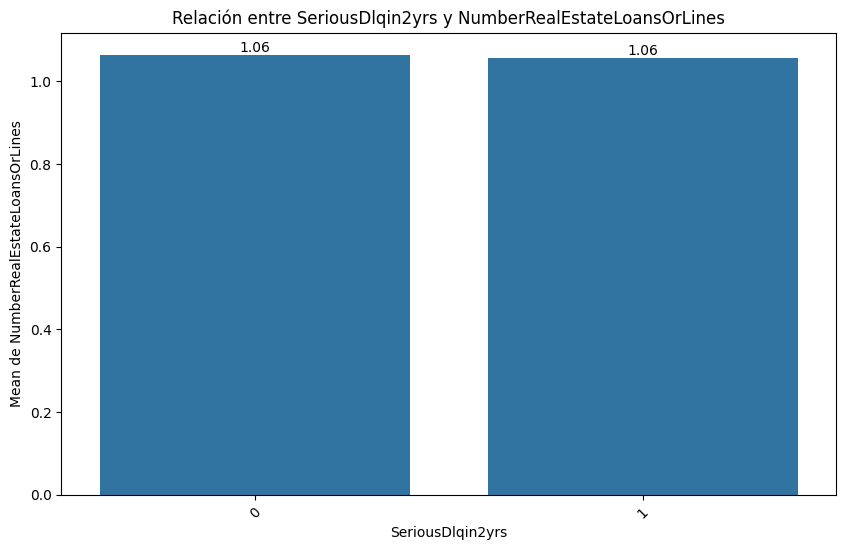

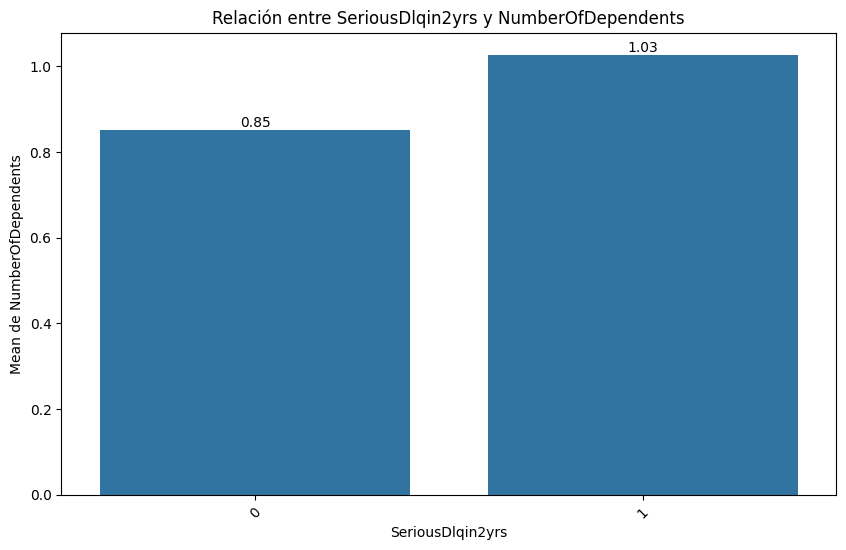

In [15]:
for col in feat_num:
    bt.plot_categorical_numerical_relationship(train, target, col, show_values=True);

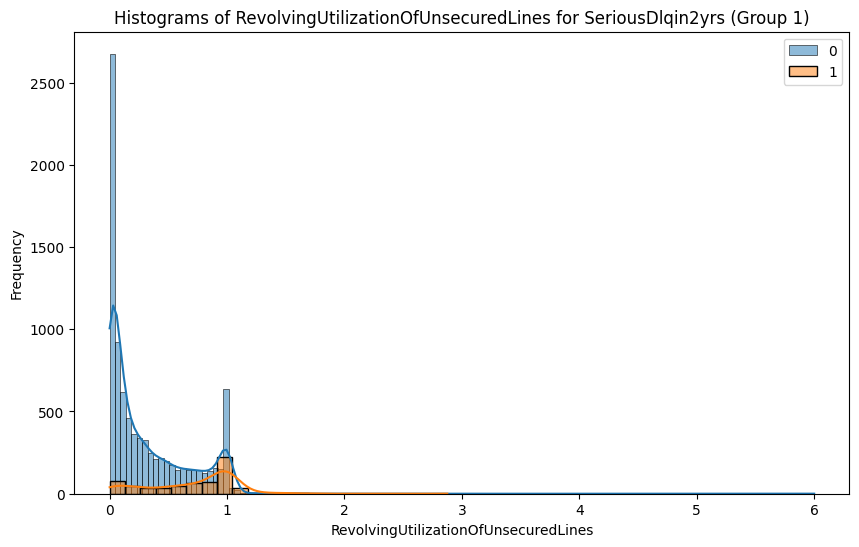

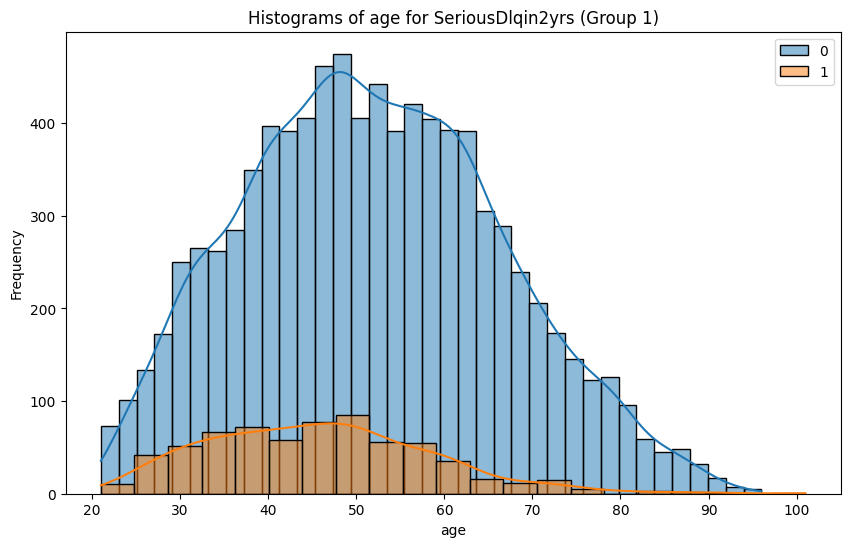

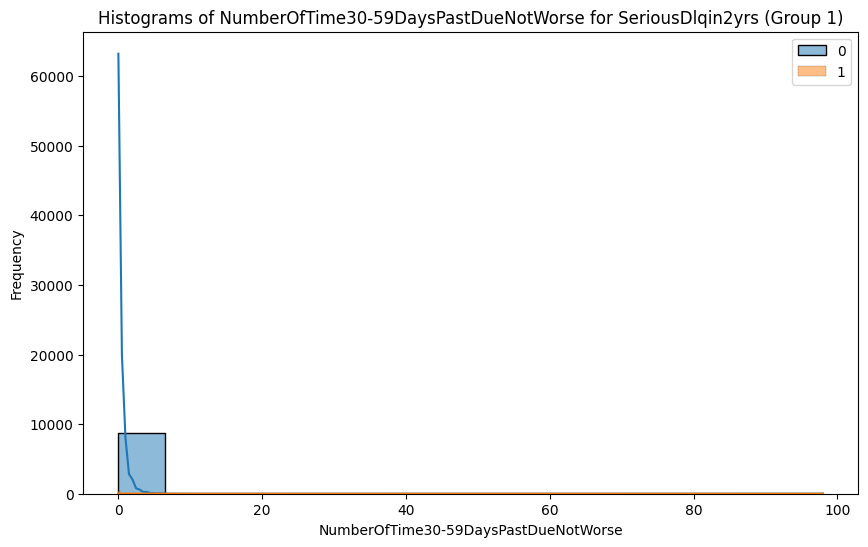

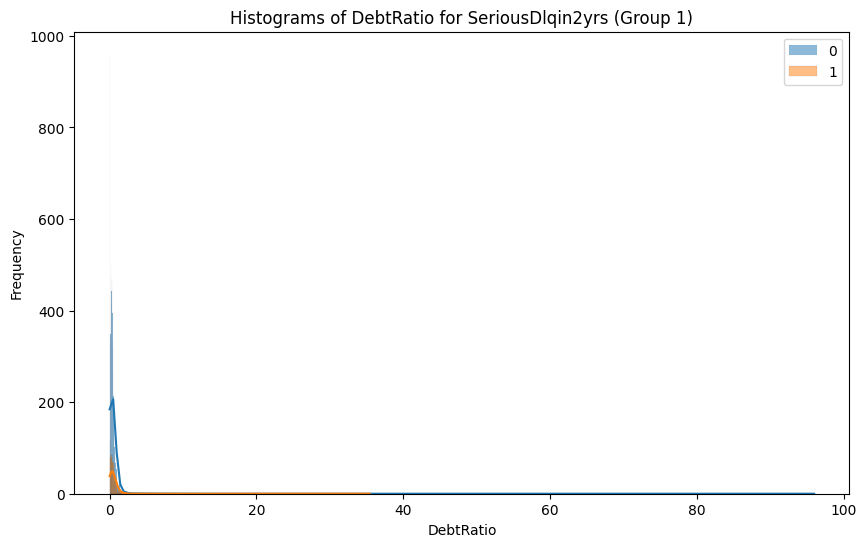

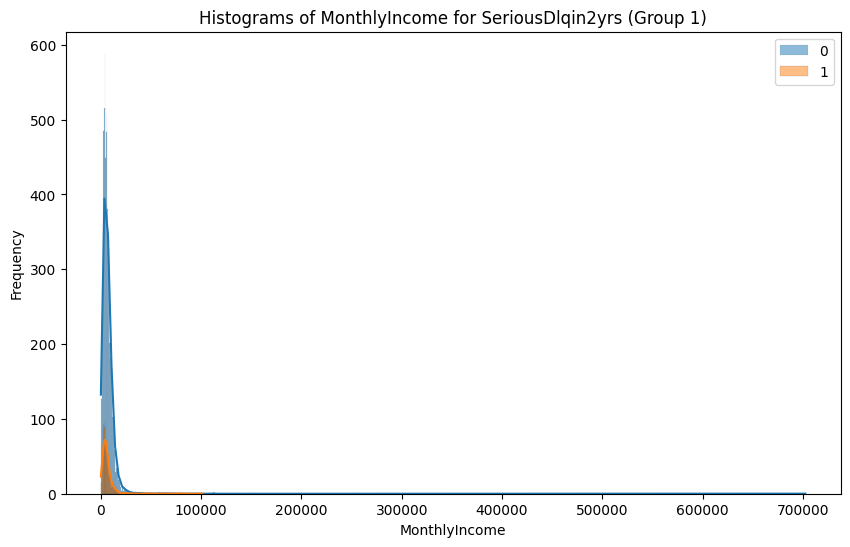

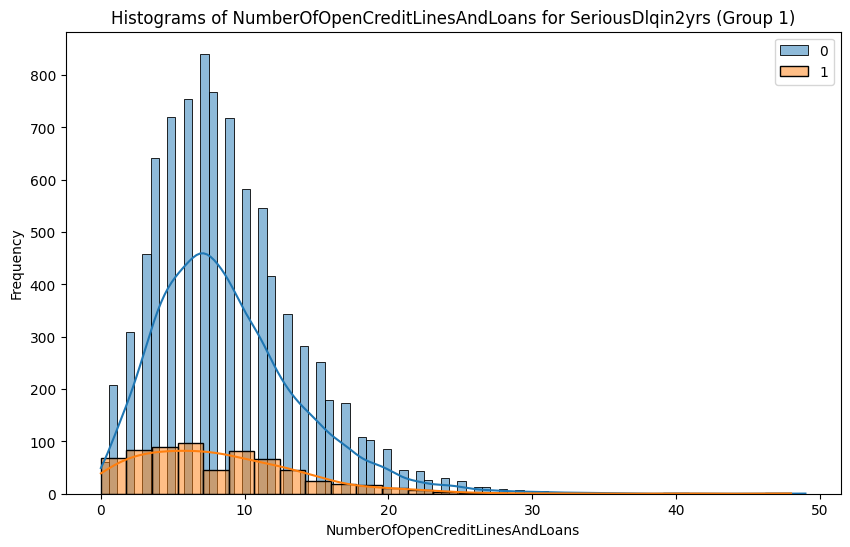

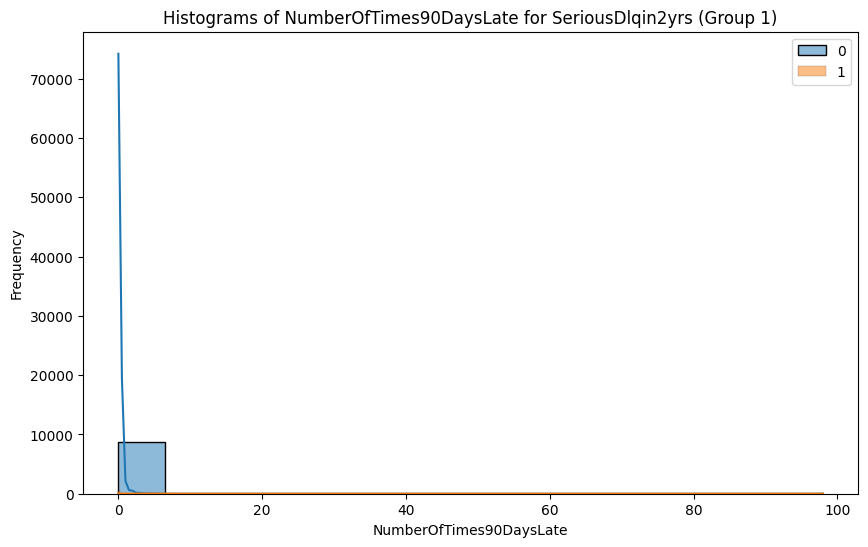

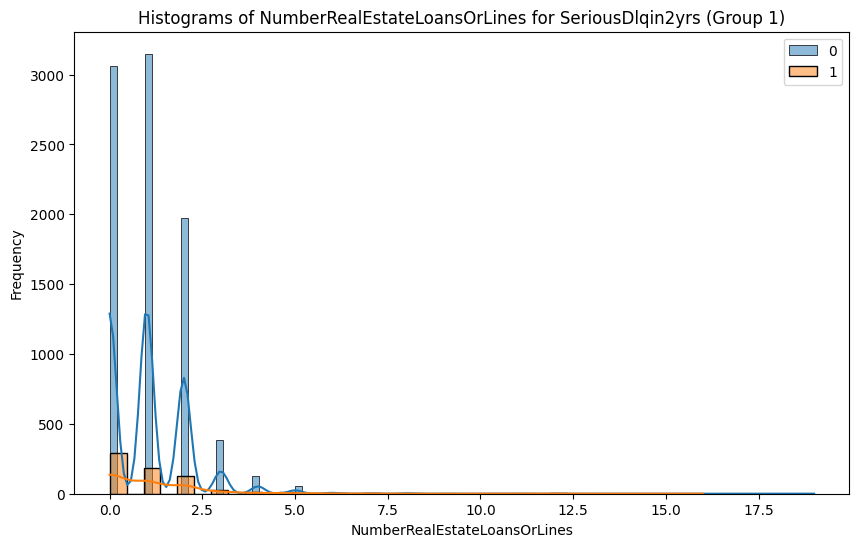

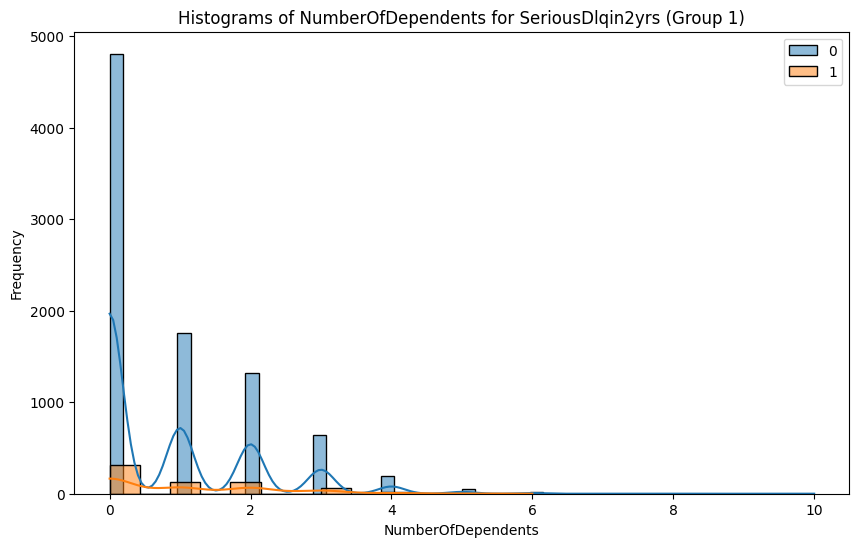

In [16]:
for col in feat_num:
    bt.plot_grouped_histograms(train, target, col, group_size = 3)

En cuanto a variables numéricas, vamos a quedarnos con una primera selección y con todas:

In [17]:
feat_num_2 = feat_num

In [18]:
feat_num = ['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'MonthlyIncome',
 'NumberOfTimes90DaysLate',
 'NumberOfDependents']

In [19]:
X_train = train[feat_num]
y_train = train[target]
X_test = test[feat_num]
y_test = test[target]

Ya hemos seleccionado nuestras features, vamos a escalarlas, puesto que vamos a utilizar dos modelos que son dependientes de este escalado.

In [20]:
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[feat_num] = scaler.fit_transform(X_train[feat_num])
X_test_scaled[feat_num] = scaler.transform(X_test[feat_num])

In [25]:
model_names = ["KNN","Logistic Regression","Random Forest"]
knn = KNeighborsClassifier()
lr = LogisticRegression(class_weight = "balanced")
rf = RandomForestClassifier(random_state= 42, max_depth = 5, class_weight = "balanced")

model_set = [knn, lr, rf]

In [26]:
metricas_cv = {}
valores = []
for nombre, modelo in zip(model_names, model_set):
    print(modelo)
    if nombre == "Random Forest":
        metricas_cv[nombre] = cross_val_score(modelo, X_train, y_train, cv = 5, scoring = "balanced_accuracy")
    else:
        metricas_cv[nombre] = cross_val_score(modelo, X_train_scaled, y_train, cv = 5, scoring = "balanced_accuracy")
    valores.append(np.mean(metricas_cv[nombre]))
ganador = list(metricas_cv.keys())[np.argmax(valores)]

KNeighborsClassifier()
LogisticRegression(class_weight='balanced')
RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=42)


In [27]:
for model_name, valores in metricas_cv.items():
    print(f"Model <{model_name}>, balanced_accuracy: {np.mean(valores)}")
print(f"El ganador es {ganador}")

Model <KNN>, balanced_accuracy: 0.5642818783939948
Model <Logistic Regression>, balanced_accuracy: 0.7561382091722738
Model <Random Forest>, balanced_accuracy: 0.7532453301422333
El ganador es Logistic Regression


Vamos a optimizar el modelo de regresión logística:

In [30]:
params_grid = {
    "class_weight": ["balanced", None],
    "penalty": ["l1", "l2"],
    "C": [1, 1.5, 2, 2.5]
}

lr = LogisticRegression()

grid_lr = GridSearchCV(lr, param_grid = params_grid, cv = 5, scoring = "balanced_accuracy", n_jobs = -1)

grid_lr.fit(X_train_scaled, y_train)

C:\Users\mpuch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mpuch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mpuch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 1.5, 2, 2.5],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2']},
             scoring='balanced_accuracy')

In [31]:
grid_lr.best_estimator_

LogisticRegression(C=1, class_weight='balanced')

In [32]:
grid_lr.best_score_

0.7561382091722738

In [33]:
print(classification_report(y_test, grid_lr.best_estimator_.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87      2197
           1       0.20      0.69      0.31       167

    accuracy                           0.78      2364
   macro avg       0.58      0.74      0.59      2364
weighted avg       0.92      0.78      0.83      2364



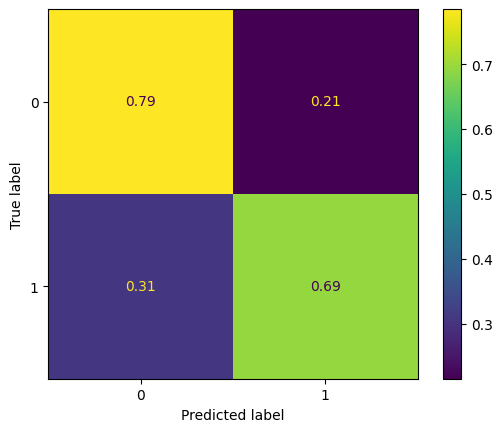

In [38]:
ConfusionMatrixDisplay.from_predictions(y_test, grid_lr.best_estimator_.predict(X_test_scaled), normalize = "true")